# Probability

## Recap version: Chris Overton 2016-09-20

Based on versions by Isaac and Ben, and after Giovanna's talk


## Objectives

* Probability, definitions and concepts
* Combinatorics, definitions and concepts
* Know how to reason about random variables
* Be able to choose probability distributions to model things appropriate

# Probability defintions

## Sets
The range of all possible outcomes or events, also called the sample space.
 * Coin flips
 * Cookies
 * Heights
 * Number of slices of pizza eaten before 10 am
 


## Set Operations

Union: $ A \cup B = \{x: x \in A \vee x\in B\}$

Intersection: $ A \cap B = \{x: x \in A \wedge x\in B\}$

Difference: $ A \setminus B = \{x: x \in A \wedge x \notin B\}$

Complement: $ A^C = \{x: x\notin A\} $

The null (empty) set: $ \emptyset $

### DeMorgan's Law

$ \neg (A \vee B) \iff \neg A \wedge \neg B $

$ \neg (A \wedge B) \iff \neg A \vee \neg B $  

Notice how union and intersection (or 'and' and 'or') get switched as not distributes over events.

# Combinatorics

The mathematics of ordering, choosing sets, etc. Useful for counting events in your sample space.

## Factorial
If there are 10 lottery balls and we want draw them all, how many possible orderings are there?

## Permutations
Number of ways to choose things when order does matter.

On a baseball team with 20 players, how many different batting orders are there?

If only the first three batters get to bat, how many lineups are there?

## Combinations
Number of ways to choose things when order doesn't matter

How many different pairs are there for afternoons sprints with 24 students?

How many ways are there to assign 15 students to three groups with sizes 3, 5, and 7?

# Probability

So far we only have a notion of sets, not of probability, what assumption do we rely on when we do basic set-based calculations, like cards?

What're examples of some sets where this assumption might be unjustifiable?

# Formal Probability

For some sample space $S$, a probability function $P$ has three properties:

For every event $A$ allowed in $S$, $ P(A) \ge 0 $

$ P(S) = 1 $

$ \forall A_i, A_j : A_i \cap A_j = \emptyset \Rightarrow P(A_i \cup A_j) = P(A_i) + P(A_j) $


# Independence

Events are independent (notation $ A\bot B$) if:

$$
P(A\cap B) = P(A)P(B)
$$

Or, equivalently

$$
P(A|B) = P(A)
$$

The above is known as _conditional_ probability.

## Check understanding
* How could we use the definition of independence to test whether two events are independent?
* What does knowing that B has occurred tell us about the likelihood of A?
 * Under independence?
 * Without independence?

# Urns

> Bernoulli used the Latin word urna, which primarily means a clay vessel, but is also the term used in ancient Rome for a vessel of any kind for collecting ballots or lots; the present-day Italian word for ballot box is still urna. Bernoulli's inspiration may have been lotteries, elections, or games of chance which involved drawing balls from a container

![Urn](http://i.dailymail.co.uk/i/pix/2015/01/29/article-urn:publicid:ap.org:fdadbd9d25a243bf92584d7b33ed6c20-6VwuLK88NHSK2-758_634x422.jpg)


# A problem

Three coins are in an Urn.  

Coin 1 has sides HH (i.e. heads on each side)  
Coin 2 has sides HT (like a normal fair coin)  
Coin 3 has sides TT (tails on each side.)

Pull out a coin and flip it. It comes up H.

What is the probability he same coin comes out H if you flip it a second time?

# Solution

$ P(X_2 = H) = 1/2 $

$ P(X_2 = H | X_1 = H) = \frac{5}{6} \ne \frac{1}{2} = P(X_2=H) $

Originally, each coin had a probability 1/3 of being picked. Now it is impossible for the coin picked to have been the third, and it is now twice as likely that the coin picked is the second.

# Conditional probability

$ P(B|A) = P(A \cap B) / P(A) $

in other words

$ P(X_2=H | X_1=H) = P(X_2 = H \cap X_1 = H) / P(X_1=H) = \frac{\frac{1}{3} + \frac{1}{3}\frac{1}{4}}{\frac{1}{2}}$

In [21]:
import random
import pandas as pd
coins = ['HH', 'HT', 'TT']
results = []
for i in range(1000):
    coin = random.choice(coins)
    results.append([random.choice(coin) for i in [1,2]])
df = pd.DataFrame(results, columns=['first', 'second']) == 'H'
df.groupby('first').mean()

,second
first,
False,0.176715
True,0.816956


# Probability Chain Rule

Under independence?

$ P(X_1, X_2, X_3) = P(X_1)*P(X_2)*P(X_3) $

Not under independence?

$ P(X_1, X_2, X_3) = P(X_1|X_2, X_3) P(X_2|X_3) P(X_3) $

More generally:

$ P(\cap_{i}^nX_i) = \prod_i^n P(X_i | \cap_k^{i-1} X_k) $

# Law of Total Probability

If $\{B_n\}$ is a partition of a sample space $ X $, meaning $ \cup_i B_i = X$ and $B_i \cap B_j=\emptyset$  $ \forall i, j$

Then for any event $A \subset X$  

$ P(A) = \sum P(A\cap B_i) $

or

$ P(A) = \sum P(A|B_i) P(B_i)$  


In [19]:
print('place keeper because Jupyter slides don\'t work...')

place keeper because Jupyter slides don't work...


# A Famous Rule

## Bayes Rule
Allows us to compute $P(B|A)$ using information about $P(A|B)$

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

### Proof (remember this if nothing else):  

The probability for the intersection can be obtained from either end of the equation below:

$$P(B|A) * P(A) = P(A \cap B) = P(A|B)* P(B)$$

### The reson this is helpful: often, it is easier to compute conditional probabilities going in one direction, but you really want conditional probabilities going in the other "hard" direction

## A famously counterintuitive example

A fairly reliable diagnostic test T exists for a rare disease D. The result of the test is either positive ($T_+$) or negative ($T_-$)

|Conditional Events | Probability |
| --------- | ----------- |
| $ P(T_+|D)$ | .99 |
| $ P(T_+|\neg D)$ | .05 |
| $P(D)$ | .005 |

So for someone who tests positive, what is their probability of having the disease ($ P(D | T_+) $)?

First, give a quick rough answer!  
In particular, are they more likely to have the disease or not?

# Random Variables

Random variables formalize a mapping we have been implicitly using already:

$ X(s) : S\Rightarrow \Re $

* Capital letters refer to random variables.
* Lowercase to refer to specific realization.
* $P(X=x) = P(\{s\in S : X(s) = x\})$ 
* $ X \sim XYZ(\alpha, \beta, ...) $ means X is distributed as, XYZ with parameters.
* "i.i.d."

# Cumulative distribution function

$ F_X(x) = P(X \leq x) $

What kinds of bounds can we put on this function?

This works for both continuous and discrete functions.

# Probability density/distribution function "PDF", Probability mass function (PMF)

Suppose X is a standard normal variable, with mean = 0, variance = 1: $X ~ N(0, 1)$.  
What is the probability p(X = 1)?

PMF (probability mass function) for discrete variables:

$ f_X(x) = P(X = x)$

PDF (probability density/distribution function) for continuous variables, think of it as the derivative of the CDF:

$ f_X(x)dx = P(x < X < x+dx) $

$ f_X(x) = \frac{dF_X(x)}{dx} $

# Expectation
Discrete:
$ E[X] = \sum_{s\in S} s * f_X(s) $

Continuous:
$ E[X] = \int_{-\infty}^{\infty}s * f_X(s)ds$

A measure, but not the only one, of the central tendency of a distribution. Alternatives?

Note, the sample mean is:

$ \bar{x} = \frac{1}{n}\sum_j^n x_j $

## Mean vs. median:

Mean: 'see-saw' point where the pdf/pmf graph would balance 

Median: a line that divides the total probability into equal halves (by area)

* Q * : What happens to mean and median if a point in the upper half of the distribution (say with value greater than the mean) increases a hundred times?

##  Quantiles (percentiles)

Quantiles are another way to characterize the distribution of data. In contrast to PDF/CDF, they go *backwards* from probability to value.

*   The *quantile function* of $X$ is

$$Q_{\alpha}(x) = \underset{x}{\min} \{ x: \Pr(X \leq x) \geq \alpha \}$$
$$Q_{\alpha}(x) = \underset{x}{\min} \{ x: F(x) \geq \alpha \},$$

where $\alpha \in (0, 1)$

*   Given regularity conditions, $Q_{\alpha}[x] = F^{-1}(\alpha)$
*   If $U = F_X(x)$ then $u \sim \mathit{U}(0,1)$
*   *percentiles* are just the quantile $\times 100$

Example: the 95th percentile of a varible X is the value x such that 95% of the time X (the variable) is $\leq$ x (the value.)   
This might be slightly confusing in case $P(X=x) > 0$

##  Common quantiles

During EDA, it is often helpful to examine:

*   Median: $Q_{0.5}[x]$
*   Upper quartile: $Q_{0.75}[x]$
*   Lower quartile: $Q_{0.25}[x]$
*   Note: the median usually does not equal the mean, especially for data with a long tail

Pro tip:    compute a box plot

# Variance

$ Var[X] = E[(X - E[X])^2] $

What are the units?

* Q:  Suppose you get the value 1 for one realization of a random variable. What is your estimate of its variance?
* Q:  Same question for two realizations with values {1, 1}
* Q : Same question for two realizations with values {1, 0}

Note, the sample variance is:

$ s^2 = \frac{1}{n-1} \sum_{j=1}^n (x_j - \bar{x})^2 $

# Standard deviation

$ \sigma(X) = \sqrt{Var[X]} $

Useful because its units are in units of our original RV.


##  Warning: ddof

Many Numpy functions compute population values by default:

*   Example:    `np.var(..., ddof=0, ...)` computes

$$s^2 = \dfrac{1}{n} \underset{i=1}{\overset{n}{\sum}} (x_i - \overline{x})^2$$

*   Must set `ddof=1` to get sample variance!

$$s^2 = \dfrac{1}{n-1} \underset{i=1}{\overset{n}{\sum}} (x_i - \overline{x})^2$$

*   `ddof` means 'delta degrees of freedom'

# Covariance
We can also compute the covariance between two different variables:

$Cov[X,Y] = E[(X - E[X])(Y - E[Y])]$

Notice $Cov[X, X]$ is just $Var(X)$  

This is related to the

# Correlation

$ Corr[X,Y] = \frac{E[(X - E[X])(Y - E[Y])]}{\sigma(X)\sigma(Y)} = \frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$ 

# Marginal Distributions

Marginal distribution takes a (multivariate) distribution of variables that might not be independent. 

It considers only a single dimension, by summing (discrete) or integrating (continuous) away the other dimensions:

$$
f_X(x) = \int_{-\infty}^\infty f_{XY}(x,y) dy
$$

# Example:

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

# Discrete case:
|x1|x2|	x3|	x4|	py(Y)
--|--|--|--|--
y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$
y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$
px(X)|?|?|?|?|?

# Conditional Distributions

$$
f(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}
$$

How would we relate that to the images we just saw?

Why might this type of conditional probability be important in data science?

# Anscombe's quartet

In [5]:
from numpy import array, amin, amax
%pylab inline

def fit(x):
    return 3+0.5*x

def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = array( [amin(x), amax(x) ] )
    figure(figsize(12,8))
    subplot(221)
    plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'I', fontsize=20)

    subplot(222)
    plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    text(3,12, 'II', fontsize=20)

    subplot(223)
    plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    text(3,12, 'III', fontsize=20)
    setp(gca(), yticks=(4,8,12), xticks=(0,10,20))

    subplot(224)

    xfit = array([amin(x4),amax(x4)])
    plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(mean(y), std(y), corrcoef(x,y)[0][1]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


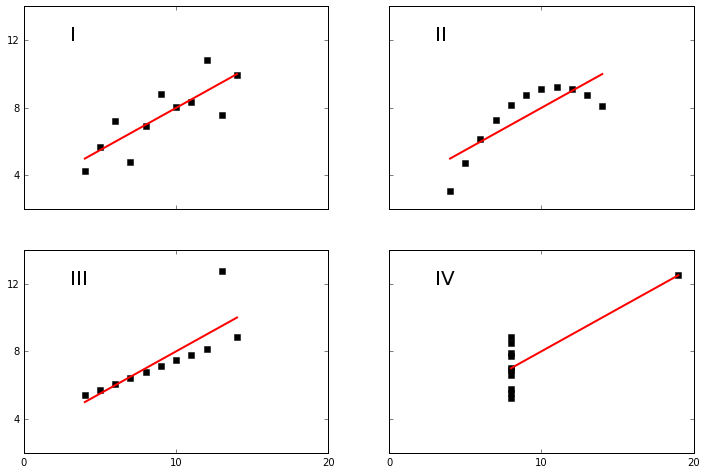

In [20]:
anscombe()

In each of the four cases above, for each of x and y, mean and variance are nearly the same, as is the correlation of x and y.  
That means the linear regression of y on x would is the same.

# Correlation
Captures:
 * Direction (positive or negative)
 * Closeness to linearity of association
 
Doesn't Capture:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width=800 />

1) Notice that correlation doesn't care what the *slope* is of any linear association.  
2) Even with zero correlation, y can have a very tight dependency on x. So 'not correlated' doesn't mean 'not related'.

#   Common distributions


##  Overview

We now review the properties of some common distributions:

*   Discrete

    -   Bernoulli
    -   Binomial
    -   Geometric
    -   Poisson

*   Continuous

    -   Uniform
    -   Exponential
    -   Gaussian a.k.a. Normal
    -   $\chi^2$ ('chi squared')
    -   Student's t
    -   F distribution

# Discrete distributions

##  1-bit Bernoulli (and even less information if $p \neq 1/2$)

Models a toss of an unfair coin or clicking on a website:

*   $X \sim \mathtt{Bernoulli}(p)$
*   PMF:    $\Pr[H] = p$ ("success") and $\Pr[T] = 1 - p$ ("failure")
*   Mean:   $\mathbb{E}[x] = p$
*   Variance:   $\mathtt{Var}[x] = p \cdot (1-p)$


##  Example: click through rate

Given $N$ visitors of whom $n$ click on the 'Buy' button:

*   What is click through rate (CTR)?
*   What is the variance of the click through rate?


##  Binomial = n-Bernoulli's

Models repeated tosses of a coin:

*   $X \sim \mathtt{Binomial}(n,p)$ for $n$ tosses of a coin where $\Pr[H] = p$
*   PMF:    $\Pr[X = k] = \dbinom{n}{k} p^k \cdot (1 - p)^{(n - k)}, \forall \, 0 \leq k \leq n$
*   Mean:   $n \cdot p$
*   Variance:   $n \cdot p \cdot (1 - p)$
*   Approaches Gaussian for limit of large $n$

##  Geometric - number of independent Bernoulli's up to first success  

### Caution: sometimes defined as this - 1: number of Bernoulli failures before success

Models probability succeeding on the $k$-th try:

*   $X \sim \mathtt{Geometric}(p, k)$
*   PMF:    $\Pr[X = k] = p \cdot (1-p) ^{(k - 1)}$
*   Mean:   $\dfrac{1}{p}$
*   Variance:   $\dfrac{1-p}{p^2}$

##  Poisson

Models count of events in a period of time, assuming a certain average rate, and independent events.

*   $X \sim \mathtt{Poisson}(\lambda)$
*   PMF:    $\Pr[X = k] = \exp(- \lambda) \cdot \dfrac{\lambda^k}{k!}, \forall \, k = 0, 1, 2, ...$
*   Mean = variance = $\lambda$
*   $\lambda$ is the number of events during the interval of interest
*   Note:  $\Pr[X = k]$ is just one term in the Taylor's series expansion of $\exp(x)$ when suitably normalized

Example: number of visitors to a web site

Remark: the assumption that mean = variance is very strong.  In practice, better to fit a model with *overdispersion* such as the negative binomial distribution, and test whether the assumption holds

# Continuous distributions  

##  Uniform

Models a process where all values in an interval $[a, b]$ are equally likely:

*   $X \sim \mathtt{U}(a,b)$
*   PDF:    $f(x) = \dfrac{1}{b - a}, \forall \, x \in [a, b]$ and $0$ otherwise
*   Mean:   $\dfrac{a+b}{2}$
*   Variance:   $\dfrac{(b-a)^2}{12}$
*   Note:   any continuous random variable can be transformed into a uniformly distributed variable by letting $u = F_X(x)$

##  Exponential

Models survival, such as the fraction of uranium which has not decayed by time $t$ or time until a bus arrives:

*   $T \sim \mathtt{Exp}(\lambda)$
*   $1 / \lambda$ is close to the half-life
*   CDF:    $\Pr[T \leq t] = 1 - e^{- \lambda \cdot t}, x \geq 0, \lambda \geq 0$
*   Mean:   $1/\lambda$
*   Variance:   $1/\lambda^2$
*   'Memory-less'

##  Gaussian a.k.a. Normal - the mother of all distributions!

A benchmark distribution:

*   $X \sim \mathit{N}(\mu, \sigma^2)$
*   PDF:    $f(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2 \pi}} \exp \left(- \dfrac{1}{2} \dfrac{ (x - \mu)^2 }{\sigma^2} \right)$
*   Often, compute the 'z-statistic':
    -   $z = \dfrac{\overline{x} - \mu}{\sigma / \sqrt{n}}$
    -   Perform a 'z-test' to check probability of observed value
*   'Standard normal' is $\mathit{N}(0,1)$ - mean $\mu = 0$, variance $\sigma^2 = 1$
    -   PDF is $\phi(x)$
    -   CDF is $\Phi(x)$  
    - Caution: the literature usually passes variance in as the second argument, as in $N(\mu, \sigma^2) $, but for scipy.stats.norm, the second scale argument is $\sigma$ (standard deviation) rather than $\sigma^2$ variance.
    
*   Will discuss Central Limit Theorem tomorrow

This is the famous 'Bell-curve' distribution and is associated with many processes, such as white noise, Brownian motion, etc.


##  Other distributions

Some other distributions:

*   $\chi^2$:
    -   Models sum of $k$ squared, independent, normally-distributed random variables
    -   Use for goodness of fit tests
*   Student's t:    distribution of the *t-statistic*:
    -   t-statistic:    $t = \dfrac{\overline{x} - \mu}{s / \sqrt{n}},$ where $s$ is the standard error
    -   Perform a 't-test' to check probability of observed value
    -   Has fatter tails than normal distribution
*   F-distribution:
    -   Distribution of the ratio of two $\chi^2$ random variables
    -   Use to test restrictions and ANOVA

##  Digression: random numbers

Bad news: the computer generates *pseudo*-random numbers:

*   Not truly random
*   Generated using a variety of algorithms so that they satisfy statistical tests
*   Most proofs use true random numbers ... so be careful they may not hold with pseudo-random numbers

# Distributions

Rules for choosing a good distribution:

* Is data discrete or continuous?
* Is data symmetric?
* What limits are there on possible values for the data?
* How likely are extreme values?

#  Summary


##  Summary

**Q**:  When do you use factorial vs. permutation vs. combination?

**Q**:  What is independence?

**Q**:  What is conditional probability? How do I use Bayes's rule?

**Q**:  What are the PDF and CDF?

**Q**:  What are moments and which should you use to characterize a distribution?  How do you calculate them?

**Q**:  What is a quantile?

**Q**:  What are some common distributions?  What type of processes do they model?